# **Data Insights**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb



In [3]:
data = pd.read_csv("/content/drive/MyDrive/data/Fraud.csv")

In [4]:
data.head()

# step -                 unit of time, 1 step = 1 hour
# nameOrig -             customer name who started transaction
# oldbalanceOrg -        initial balance before the transaction
# newbalanceOrig -       new balance after the transaction
# nameDest -             recipient customer name


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
col = ['nameOrig', 'nameDest', 'isFlaggedFraud' ]
data = data.drop(col, axis=1)

In [8]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [9]:
data1 = pd.get_dummies(data, columns=['type']).astype(int)

<Axes: >

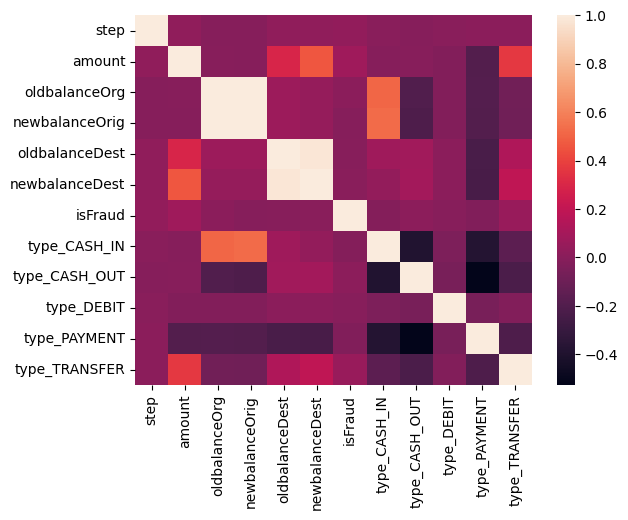

In [10]:
sns.heatmap(data1.corr())

In [11]:
#Robust Scaler handles outliers well while other Scaler are sensitive towards outliers, good for skewed data as in case of fraud
scaler = RobustScaler()
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data1[cols] = scaler.fit_transform(data1[cols])

In [12]:
data1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.332933,1.452994,1.111176,-0.140721,-0.193056,0,0,0,0,1,0
1,1,-0.373761,0.065611,0.134370,-0.140721,-0.193056,0,0,0,0,1,0
2,1,-0.382377,-0.130709,0.000000,-0.140721,-0.193056,1,0,0,0,0,1
3,1,-0.382377,-0.130709,0.000000,-0.118260,-0.193056,1,0,1,0,0,0
4,1,-0.323570,0.254820,0.207164,-0.140721,-0.193056,0,0,0,0,1,0


In [13]:
X = data1.drop('isFraud', axis=1)

x_train, X_test, y_train, Y_test = train_test_split(X,data1['isFraud'] , random_state=42,  test_size=0.2,  shuffle=True)

x_test, x_val, y_test, y_val = train_test_split(X_test, Y_test, random_state=42,  test_size=0.5,  shuffle=True)


In [14]:
print("Train dataset size:",x_train.shape)
print("Train dataset size:",x_val.shape)
print("Train dataset size:",x_test.shape)

Train dataset size: (5090096, 11)
Train dataset size: (636262, 11)
Train dataset size: (636262, 11)


# **Existing ML Models**

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(x_train_resampled[:1000000], y_train_resampled[:1000000])

# Predictions
y_pred_rf = rf_clf.predict(x_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635434
           1       0.99      0.78      0.87       828

    accuracy                           1.00    636262
   macro avg       0.99      0.89      0.94    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
[[635427      7]
 [   184    644]]


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


<Axes: >

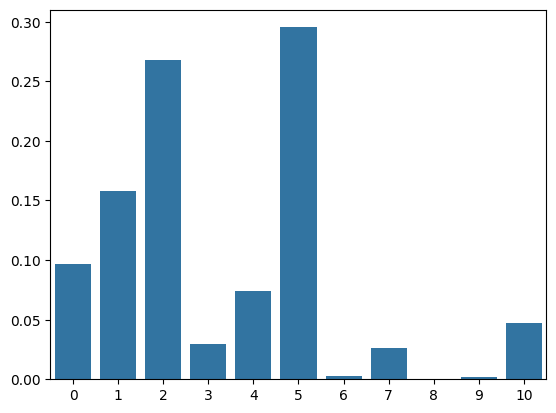

In [35]:
#Important Features

print(data1.columns)
sns.barplot(rf_clf.feature_importances_)


# **Data Resampling & NN Model**

### **Resampling Unbalanced dataset**

In [15]:
! pip install imbalanced-learn
! pip install tqdm

In [16]:
from imblearn.over_sampling import SMOTE                      #SMOTE generates synthetic samples from the minority class to balance the dataset


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)                 # X_resampled and y_resampled are balanced dataset

### **Neural Network Model**

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tqdm.keras import TqdmCallback

In [18]:
model = Sequential([
    Dense(64, input_shape=(11,), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [19]:
from keras import backend as K

# Define custom metrics functions as by default they are not in keras so to be used while model training
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def f1_score(y_true, y_pred):
    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    return 2 * ((precision_value * recall_value) / (precision_value + recall_value + K.epsilon()))

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision, recall, f1_score])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(x_train_resampled, y_train_resampled,
                    epochs=1,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

158860/158860 [==============================] - 793s 5ms/step - loss: 0.1011 - accuracy: 0.9647 - precision: 0.9655 - recall: 0.9626 - f1_score: 0.9632 - val_loss: 0.0823 - val_accuracy: 0.9710 - val_precision: 0.0359 - val_recall: 0.0767 - val_f1_score: 0.0460


In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

19884/19884 [==============================] - 57s 3ms/step - loss: 0.0819 - accuracy: 0.9711 - precision: 0.0272 - recall: 0.0404 - f1_score: 0.0310


ValueError: too many values to unpack (expected 2)

In [25]:
# Predictions on test data
y_pred = (model.predict(x_test) > 0.5).astype('int32')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

19884/19884 [==============================] - 34s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    635434
           1       0.04      1.00      0.08       828

    accuracy                           0.97    636262
   macro avg       0.52      0.98      0.53    636262
weighted avg       1.00      0.97      0.98    636262

Confusion Matrix:
[[617071  18363]
 [     1    827]]


# **Answers to the Questions asked**

**1. Data cleaning including missing values, outliers and multi-collinearity.**

No Missing values found, and the above heatmap shows no multicollinearity

**2. Describe your fraud detection model in elaboration.**

I have taken two approaches, one is using Random forest directly by importing from sklearn, and second crated a neural network using the Tensorflow library.
I made a sequential model with the following detials:
Layer (type)                Output Shape              Param
=================================================================
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
=================================================================
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)


**3. How did you select variables to be included in the model?**

I selected the features which are related to transaction, and dropped other as name of sender and reciever.

**5. What are the key factors that predict fraudulent customer?**

As Random forest data shows that 'oldbalanceOrg' and 'newbalanceDest' are the two main factors that predict fradulent customer

**6. Do these factors make sense? If yes, How? If not, How not?**

As 'oldbalanceOrg' - initial balance before the transaction, and 'newbalanceDest' - new balance recipient after the transaction are tracking the amount of transaction indirectly, hence yes they do make sense, corresponding to frauds.

**7. What kind of prevention should be adopted while company update its infrastructure?**

Company can create a check over the amount of transaction occuring by Transaction monitoring and threshold alerts, it can also provide double verification as Multi-Factor authentication if a amount that seems fraudulent is spotted.

**8. Assuming these actions have been implemented, how would you determine if they work?**

After these steps, we need to continuously collect data on fraudulent activities and relevant metrics after implementing the changes.We will have to set up regular reporting intervals (e.g., weekly, monthly) to monitor the performance of the implemented measures. Based on the evaluation, make iterative improvements to the anti-fraud measures.